In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  math

In [2]:
%matplotlib inline

In [3]:
ccdata = pd.read_csv('consumer_complains.csv', engine="python")

In [4]:
ccdata.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [5]:
ccdata.tail()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
395848,2352,Credit card,NaN,Credit determination,NaN,NY,13350,Web,12/01/2011,12/05/2011,Capital One,Closed without relief,Yes,Yes
395849,2366,Credit card,NaN,Credit reporting,NaN,FL,33415,Referral,12/01/2011,12/06/2011,Citibank,Closed without relief,Yes,Yes
395850,2368,Credit card,NaN,Credit line increase/decrease,NaN,FL,32792,Web,12/01/2011,12/05/2011,Citibank,Closed without relief,Yes,No
395851,2371,Credit card,NaN,Other fee,NaN,HI,96813,Web,12/01/2011,12/19/2011,Capital One,Closed without relief,Yes,No
395852,2374,Credit card,NaN,Payoff process,NaN,CA,94108,Phone,12/01/2011,12/05/2011,Capital One,Closed without relief,Yes,Yes


In [6]:
#change_indices to get data for different variables
ccdata_bydate = ccdata
ccdata_byproduct = ccdata
ccdata_bycompany = ccdata

In [7]:
ccdata_bydate.index = pd.to_datetime(ccdata_bydate['Date received'], format="%m/%d/%Y")

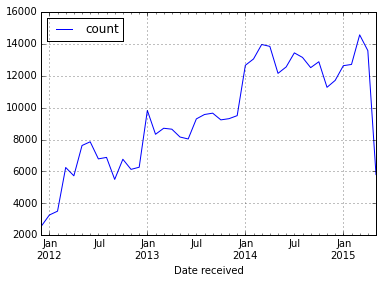

In [8]:
plt.figure()
ccdata_bydate['Complaint ID'].resample("M", how=["count"]).plot()


In [9]:
ccdata_bydate.index.to_series().map(lambda d: d.weekday())
ccdata_bydate["weekday"] = ccdata_bydate.index.to_series().map(lambda d: d.weekday())

In [10]:
weekday = ["Sa", "Su", "M", "Tu", "W", "Th", "F"]
data_byweekday = ccdata_bydate.weekday.value_counts()

In [11]:
data_byweekday.index = weekday

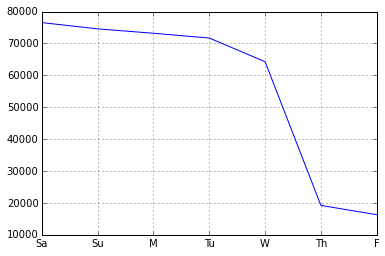

In [12]:
data_byweekday.plot()

In [14]:
ccdata_byproduct.index = ccdata_byproduct['Product']

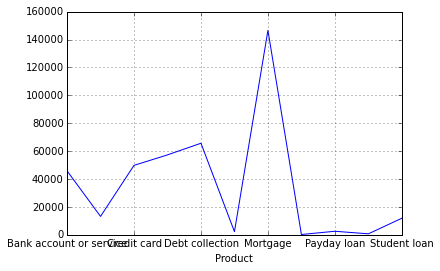

In [15]:
ccdata_byproduct['Product'].groupby(ccdata_byproduct.index).count().plot()

In [17]:
ccdata_bycompany.index = ccdata_bycompany['Company']

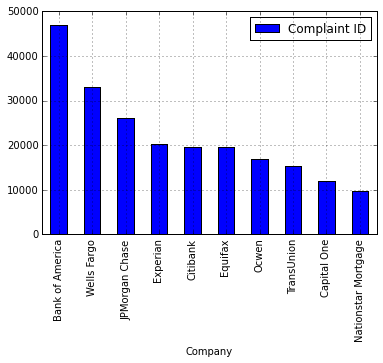

In [25]:
top_ten_comp = ccdata_bycompany.groupby('Company').count().sort_index(by='Complaint ID')[::-1]
top_ten_comp.loc[:,['Complaint ID']][0:10].plot(kind='bar')

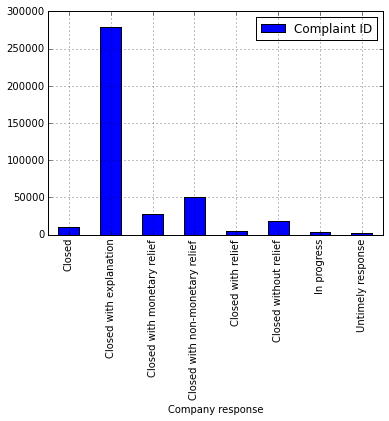

In [29]:
complaints_response = ccdata.loc[:,['Company response', 'Complaint ID']]
complaints_response.index = complaints_response['Company response']
complaints_response.groupby('Company response').count().plot(kind='bar')

###The mean number of complaints by day of weekday

In [32]:
dailymean = ccdata.groupby('Date received').count()
dailymean

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,weekday
Date received,,,,,,,,,,,,,,
01/01/2012,9,9,7,9,0,9,8,9,9,9,9,9,9,9
01/01/2013,59,59,34,59,13,59,59,59,59,59,59,59,58,59
01/01/2014,88,88,50,88,35,88,88,88,88,88,88,88,84,88
01/01/2015,129,129,76,129,57,129,127,129,129,129,129,129,128,129
01/02/2012,31,31,17,31,0,31,31,31,31,31,31,31,31,31
01/02/2013,245,245,171,245,29,244,244,245,245,245,245,245,242,245
01/02/2014,439,439,285,439,168,429,436,439,439,439,439,439,422,439
01/02/2015,429,429,292,429,175,428,427,429,429,429,429,429,425,429
01/03/2012,108,108,62,108,0,105,105,108,108,108,108,108,105,108
